In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import TSNE
from sklearn.metrics import (adjusted_mutual_info_score, adjusted_rand_score,
                             classification_report)
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.random_projection import GaussianRandomProjection
from transform_data import get_train_test_ds

random_state = 42
range_n_clusters = range(2, 61)
dataset_name = 'bank'
dataset_dir = 'data/bank.csv'

# PCA

In [44]:
X, X_train, X_test, y, y_train, y_test = get_train_test_ds(dataset_name, dataset_dir, random_state)
X_train.shape, X_test.shape

((140022, 24), (35006, 24))

In [28]:
pca = PCA(n_components=14, random_state=random_state)
pipe = Pipeline([
  ('scaler', StandardScaler()), 
  ('pca', pca),
])

X = pipe.fit_transform(X)

## GMM

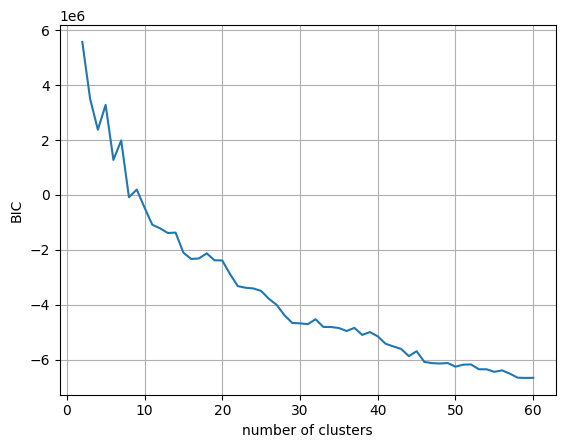

In [4]:
bic_list = []
for n_clusters in range_n_clusters:
    clusterer = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=random_state)
    cluster_labels_train = clusterer.fit_predict(X)

    bic_list.append(clusterer.bic(X))

plt.plot(range_n_clusters, bic_list, label='bic')
plt.xlabel("number of clusters")
plt.ylabel("BIC")
plt.grid()
plt.show()

In [29]:
clusterer = GaussianMixture(n_components=29, covariance_type='full', random_state=random_state)
cluster_labels = clusterer.fit_predict(X)

y_df = pd.concat([y], axis=1)
y_df['y_pred'] = cluster_labels
pos_ratio = y_train.value_counts()[1]/len(y_train)

class_distribution = y_df.groupby('y_pred')['y'].value_counts().unstack(fill_value=0)
class_distribution['ratio'] = class_distribution[1]/(class_distribution[0]+class_distribution[1])
class_distribution['fit'] = np.where(class_distribution['ratio']>=pos_ratio, 1, 0)

# test scores
y_df = pd.concat([y], axis=1)
y_df['y_pred'] = cluster_labels
y_df['y_pred'] = np.where(y_df['y_pred'].isin(class_distribution.query('fit==1').index), 1, 0)

ami = adjusted_mutual_info_score(y, cluster_labels)
ari = adjusted_rand_score(y, cluster_labels)
f1_score = classification_report(y_df['y'], y_df['y_pred'], output_dict=True)['1']['f1-score']

print(f"ami: {ami}")
print(f"ari: {ari}")
print(f"f1_score: {f1_score}")

ami: 0.022441620223938096
ari: 0.005737181834205037
f1_score: 0.4163912642051583


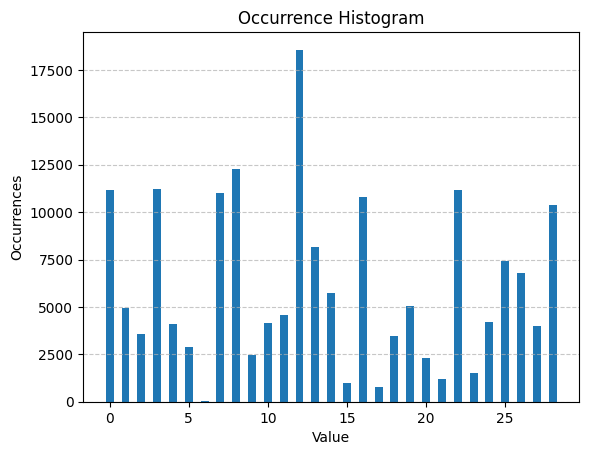

In [30]:
hist, bins = np.histogram(cluster_labels, bins=np.arange(cluster_labels.min(), cluster_labels.max() + 2))
plt.bar(bins[:-1], hist, align='center', width=0.5)
plt.xlabel('Value')
plt.ylabel('Occurrences')
plt.title('Occurrence Histogram')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.show()

## KMeans

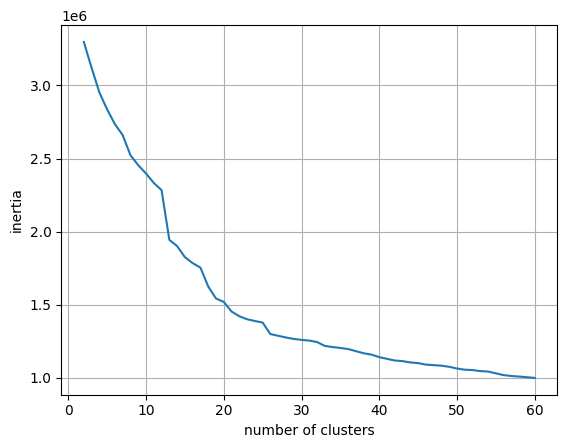

In [7]:
inertia_list = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=random_state)
    cluster_labels_train = clusterer.fit_predict(X)

    inertia_list.append(clusterer.inertia_)

plt.plot(range_n_clusters, inertia_list, label='inertia')
plt.xlabel("number of clusters")
plt.ylabel("inertia")
plt.grid()
plt.show()

In [8]:
clusterer = KMeans(n_clusters=26, random_state=random_state)
cluster_labels = clusterer.fit_predict(X)

y_df = pd.concat([y], axis=1)
y_df['y_pred'] = cluster_labels
pos_ratio = y_train.value_counts()[1]/len(y_train)

class_distribution = y_df.groupby('y_pred')['y'].value_counts().unstack(fill_value=0)
class_distribution['ratio'] = class_distribution[1]/(class_distribution[0]+class_distribution[1])
class_distribution['fit'] = np.where(class_distribution['ratio']>=pos_ratio, 1, 0)

# test scores
y_df = pd.concat([y], axis=1)
y_df['y_pred'] = cluster_labels
y_df['y_pred'] = np.where(y_df['y_pred'].isin(class_distribution.query('fit==1').index), 1, 0)

ami = adjusted_mutual_info_score(y, cluster_labels)
ari = adjusted_rand_score(y, cluster_labels)
f1_score = classification_report(y_df['y'], y_df['y_pred'], output_dict=True)['1']['f1-score']

print(f"ami: {ami}")
print(f"ari: {ari}")
print(f"f1_score: {f1_score}")

ami: 0.021831763839089784
ari: 0.0046481992780628015
f1_score: 0.43404036602938884


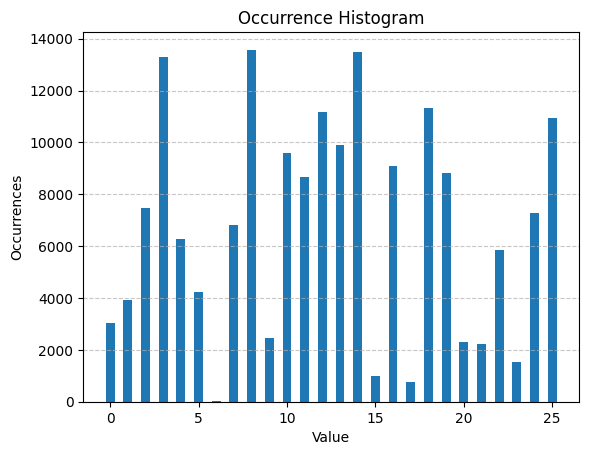

In [9]:
hist, bins = np.histogram(cluster_labels, bins=np.arange(cluster_labels.min(), cluster_labels.max() + 2))
plt.bar(bins[:-1], hist, align='center', width=0.5)
plt.xlabel('Value')
plt.ylabel('Occurrences')
plt.title('Occurrence Histogram')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.show()

# ICA

In [31]:
X, X_train, X_test, y, y_train, y_test = get_train_test_ds(dataset_name, dataset_dir, random_state)
X_train.shape, X_test.shape

((140022, 24), (35006, 24))

In [32]:
ica = FastICA(n_components=4, max_iter=500, random_state=random_state)
pipe = Pipeline([
  ('scaler', StandardScaler()), 
  ('ica', ica),
])

X = pipe.fit_transform(X)

## GMM

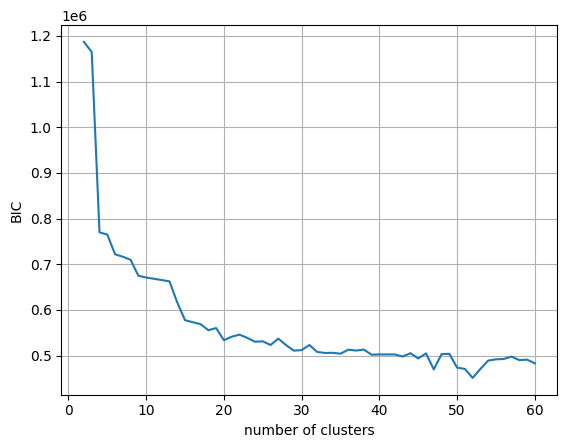

In [12]:
bic_list = []
for n_clusters in range_n_clusters:
    clusterer = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=random_state)
    cluster_labels_train = clusterer.fit_predict(X)

    bic_list.append(clusterer.bic(X))

plt.plot(range_n_clusters, bic_list, label='bic')
plt.xlabel("number of clusters")
plt.ylabel("BIC")
plt.grid()
plt.show()

In [33]:
clusterer = GaussianMixture(n_components=15, covariance_type='full', random_state=random_state)
cluster_labels = clusterer.fit_predict(X)

y_df = pd.concat([y], axis=1)
y_df['y_pred'] = cluster_labels
pos_ratio = y_train.value_counts()[1]/len(y_train)

class_distribution = y_df.groupby('y_pred')['y'].value_counts().unstack(fill_value=0)
class_distribution['ratio'] = class_distribution[1]/(class_distribution[0]+class_distribution[1])
class_distribution['fit'] = np.where(class_distribution['ratio']>=pos_ratio, 1, 0)

# test scores
y_df = pd.concat([y], axis=1)
y_df['y_pred'] = cluster_labels
y_df['y_pred'] = np.where(y_df['y_pred'].isin(class_distribution.query('fit==1').index), 1, 0)

ami = adjusted_mutual_info_score(y, cluster_labels)
ari = adjusted_rand_score(y, cluster_labels)
f1_score = classification_report(y_df['y'], y_df['y_pred'], output_dict=True)['1']['f1-score']

print(f"ami: {ami}")
print(f"ari: {ari}")
print(f"f1_score: {f1_score}")

ami: 0.03625233091421207
ari: 0.005799263346636975
f1_score: 0.44426098535286285


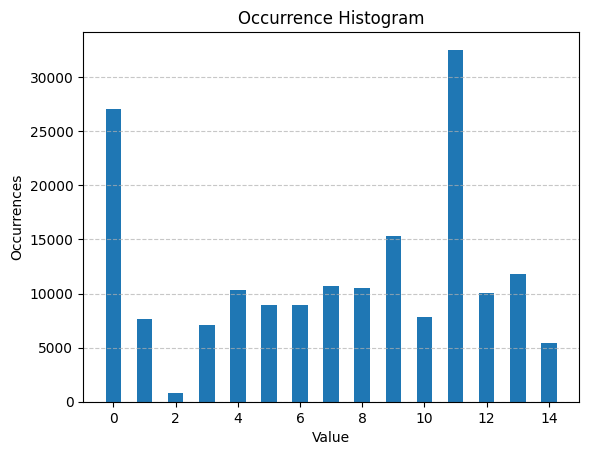

In [34]:
hist, bins = np.histogram(cluster_labels, bins=np.arange(cluster_labels.min(), cluster_labels.max() + 2))
plt.bar(bins[:-1], hist, align='center', width=0.5)
plt.xlabel('Value')
plt.ylabel('Occurrences')
plt.title('Occurrence Histogram')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.show()

## KMeans

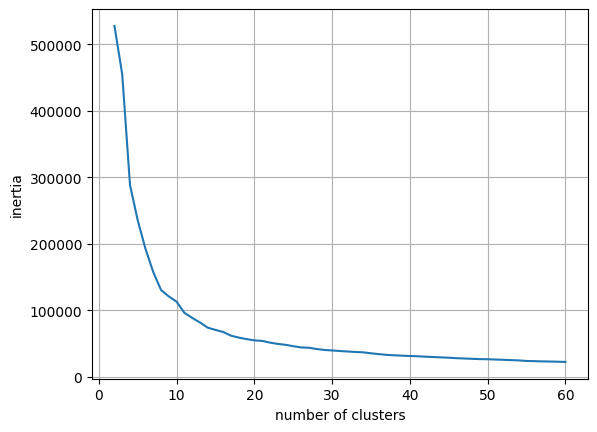

In [15]:
inertia_list = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=random_state)
    cluster_labels_train = clusterer.fit_predict(X)

    inertia_list.append(clusterer.inertia_)

plt.plot(range_n_clusters, inertia_list, label='inertia')
plt.xlabel("number of clusters")
plt.ylabel("inertia")
plt.grid()
plt.show()

In [35]:
clusterer = KMeans(n_clusters=8, random_state=random_state)
cluster_labels = clusterer.fit_predict(X)

y_df = pd.concat([y], axis=1)
y_df['y_pred'] = cluster_labels
pos_ratio = y_train.value_counts()[1]/len(y_train)

class_distribution = y_df.groupby('y_pred')['y'].value_counts().unstack(fill_value=0)
class_distribution['ratio'] = class_distribution[1]/(class_distribution[0]+class_distribution[1])
class_distribution['fit'] = np.where(class_distribution['ratio']>=pos_ratio, 1, 0)

# test scores
y_df = pd.concat([y], axis=1)
y_df['y_pred'] = cluster_labels
y_df['y_pred'] = np.where(y_df['y_pred'].isin(class_distribution.query('fit==1').index), 1, 0)

ami = adjusted_mutual_info_score(y, cluster_labels)
ari = adjusted_rand_score(y, cluster_labels)
f1_score = classification_report(y_df['y'], y_df['y_pred'], output_dict=True)['1']['f1-score']

print(f"ami: {ami}")
print(f"ari: {ari}")
print(f"f1_score: {f1_score}")

ami: 0.029333214968947925
ari: 0.01740142384734894
f1_score: 0.4091241159555452


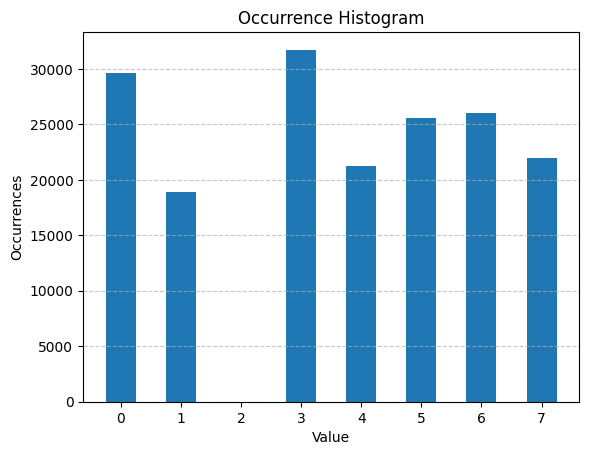

In [36]:
hist, bins = np.histogram(cluster_labels, bins=np.arange(cluster_labels.min(), cluster_labels.max() + 2))
plt.bar(bins[:-1], hist, align='center', width=0.5)
plt.xlabel('Value')
plt.ylabel('Occurrences')
plt.title('Occurrence Histogram')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.show()

# Random projection

In [37]:
X, X_train, X_test, y, y_train, y_test = get_train_test_ds(dataset_name, dataset_dir, random_state)
X_train.shape, X_test.shape

((140022, 24), (35006, 24))

In [38]:
rca = GaussianRandomProjection(n_components=21, random_state=random_state)
pipe = Pipeline([
  ('scaler', StandardScaler()), 
  ('rca', rca),
])

X = pipe.fit_transform(X)

## GMM

/home/jack/data/omscs/7641 - ml/venv/lib/python3.10/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


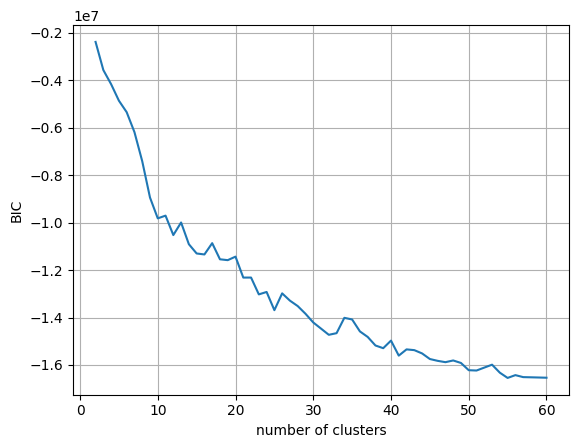

In [20]:
bic_list = []
for n_clusters in range_n_clusters:
    clusterer = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=random_state)
    cluster_labels_train = clusterer.fit_predict(X)

    bic_list.append(clusterer.bic(X))

plt.plot(range_n_clusters, bic_list, label='bic')
plt.xlabel("number of clusters")
plt.ylabel("BIC")
plt.grid()
plt.show()

In [39]:
clusterer = GaussianMixture(n_components=25, covariance_type='full', random_state=random_state)
cluster_labels = clusterer.fit_predict(X)

y_df = pd.concat([y], axis=1)
y_df['y_pred'] = cluster_labels
pos_ratio = y_train.value_counts()[1]/len(y_train)

class_distribution = y_df.groupby('y_pred')['y'].value_counts().unstack(fill_value=0)
class_distribution['ratio'] = class_distribution[1]/(class_distribution[0]+class_distribution[1])
class_distribution['fit'] = np.where(class_distribution['ratio']>=pos_ratio, 1, 0)

# test scores
y_df = pd.concat([y], axis=1)
y_df['y_pred'] = cluster_labels
y_df['y_pred'] = np.where(y_df['y_pred'].isin(class_distribution.query('fit==1').index), 1, 0)

ami = adjusted_mutual_info_score(y, cluster_labels)
ari = adjusted_rand_score(y, cluster_labels)
f1_score = classification_report(y_df['y'], y_df['y_pred'], output_dict=True)['1']['f1-score']

print(f"ami: {ami}")
print(f"ari: {ari}")
print(f"f1_score: {f1_score}")

ami: 0.0241714544473533
ari: 0.009505876660209264
f1_score: 0.42992787929737625


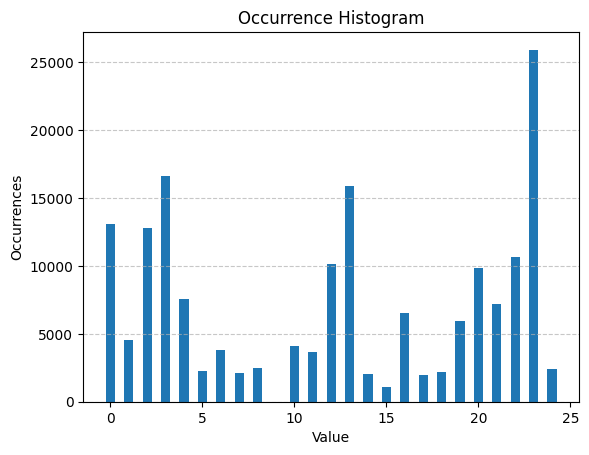

In [40]:
hist, bins = np.histogram(cluster_labels, bins=np.arange(cluster_labels.min(), cluster_labels.max() + 2))
plt.bar(bins[:-1], hist, align='center', width=0.5)
plt.xlabel('Value')
plt.ylabel('Occurrences')
plt.title('Occurrence Histogram')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.show()

## KMeans

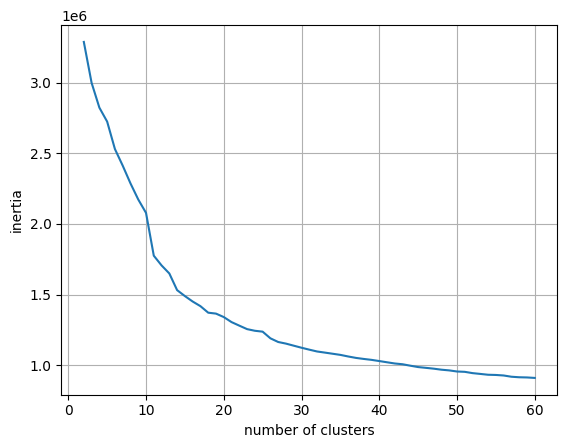

In [23]:
inertia_list = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=random_state)
    cluster_labels_train = clusterer.fit_predict(X)

    inertia_list.append(clusterer.inertia_)

plt.plot(range_n_clusters, inertia_list, label='inertia')
plt.xlabel("number of clusters")
plt.ylabel("inertia")
plt.grid()
plt.show()

In [41]:
clusterer = KMeans(n_clusters=14, random_state=random_state)
cluster_labels = clusterer.fit_predict(X)

y_df = pd.concat([y], axis=1)
y_df['y_pred'] = cluster_labels
pos_ratio = y_train.value_counts()[1]/len(y_train)

class_distribution = y_df.groupby('y_pred')['y'].value_counts().unstack(fill_value=0)
class_distribution['ratio'] = class_distribution[1]/(class_distribution[0]+class_distribution[1])
class_distribution['fit'] = np.where(class_distribution['ratio']>=pos_ratio, 1, 0)

# test scores
y_df = pd.concat([y], axis=1)
y_df['y_pred'] = cluster_labels
y_df['y_pred'] = np.where(y_df['y_pred'].isin(class_distribution.query('fit==1').index), 1, 0)

ami = adjusted_mutual_info_score(y, cluster_labels)
ari = adjusted_rand_score(y, cluster_labels)
f1_score = classification_report(y_df['y'], y_df['y_pred'], output_dict=True)['1']['f1-score']

print(f"ami: {ami}")
print(f"ari: {ari}")
print(f"f1_score: {f1_score}")

ami: 0.021401919453863494
ari: 0.0081208496461813
f1_score: 0.41105429474288996


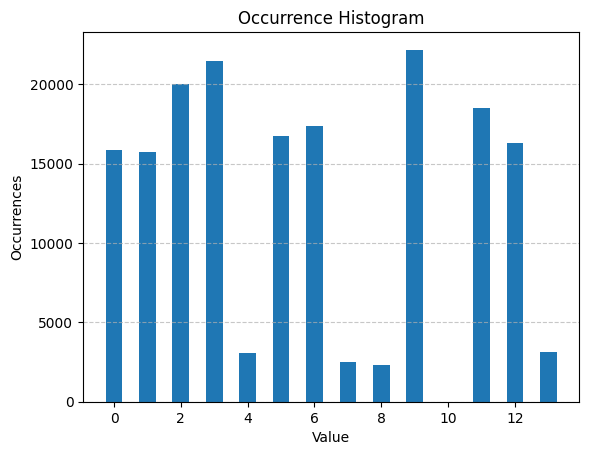

In [42]:
hist, bins = np.histogram(cluster_labels, bins=np.arange(cluster_labels.min(), cluster_labels.max() + 2))
plt.bar(bins[:-1], hist, align='center', width=0.5)
plt.xlabel('Value')
plt.ylabel('Occurrences')
plt.title('Occurrence Histogram')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.show()

# t-SNE

In [27]:
X, X_train, X_test, y, y_train, y_test = get_train_test_ds(dataset_name, dataset_dir, random_state)
X_train.shape, X_test.shape

((140022, 24), (35006, 24))

In [28]:
full_scaler = StandardScaler()
X = full_scaler.fit_transform(X)

tsne = TSNE(n_components=3, n_jobs=-1, random_state=random_state)
X = tsne.fit_transform(X)

## GMM

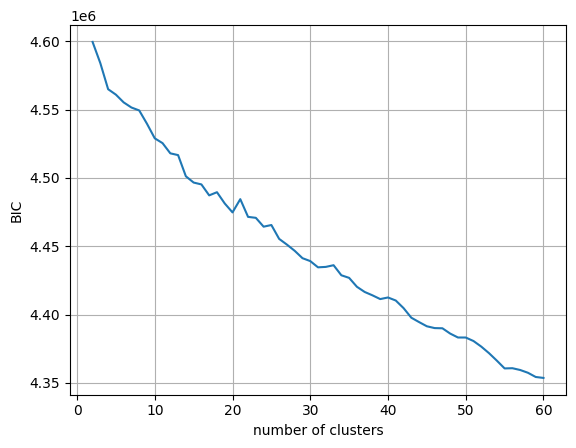

In [29]:
bic_list = []
for n_clusters in range_n_clusters:
    clusterer = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=random_state)
    cluster_labels_train = clusterer.fit_predict(X)

    bic_list.append(clusterer.bic(X))

plt.plot(range_n_clusters, bic_list, label='bic')
plt.xlabel("number of clusters")
plt.ylabel("BIC")
plt.grid()
plt.show()

In [30]:
clusterer = GaussianMixture(n_components=55, covariance_type='full', random_state=random_state)
cluster_labels = clusterer.fit_predict(X)

y_df = pd.concat([y], axis=1)
y_df['y_pred'] = cluster_labels
pos_ratio = y_train.value_counts()[1]/len(y_train)

class_distribution = y_df.groupby('y_pred')['y'].value_counts().unstack(fill_value=0)
class_distribution['ratio'] = class_distribution[1]/(class_distribution[0]+class_distribution[1])
class_distribution['fit'] = np.where(class_distribution['ratio']>=pos_ratio, 1, 0)

# test scores
y_df = pd.concat([y], axis=1)
y_df['y_pred'] = cluster_labels
y_df['y_pred'] = np.where(y_df['y_pred'].isin(class_distribution.query('fit==1').index), 1, 0)

ami = adjusted_mutual_info_score(y, cluster_labels)
ari = adjusted_rand_score(y, cluster_labels)
f1_score = classification_report(y_df['y'], y_df['y_pred'], output_dict=True)['1']['f1-score']

print(f"ami: {ami}")
print(f"ari: {ari}")
print(f"f1_score: {f1_score}")

ami: 0.04117758462582235
ari: 0.0046762486229493545
f1_score: 0.5007249791568492


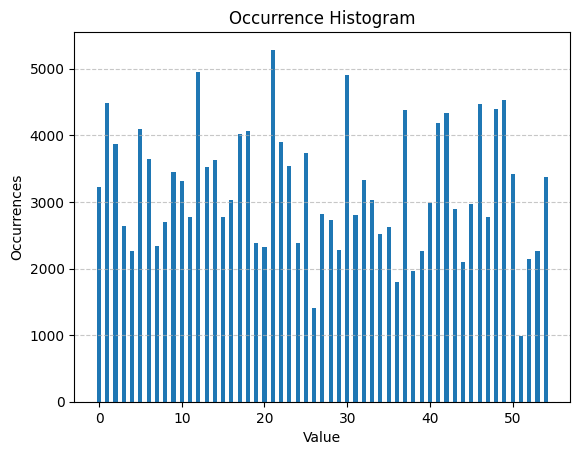

In [31]:
hist, bins = np.histogram(cluster_labels, bins=np.arange(cluster_labels.min(), cluster_labels.max() + 2))
plt.bar(bins[:-1], hist, align='center', width=0.5)
plt.xlabel('Value')
plt.ylabel('Occurrences')
plt.title('Occurrence Histogram')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.show()

## KMeans

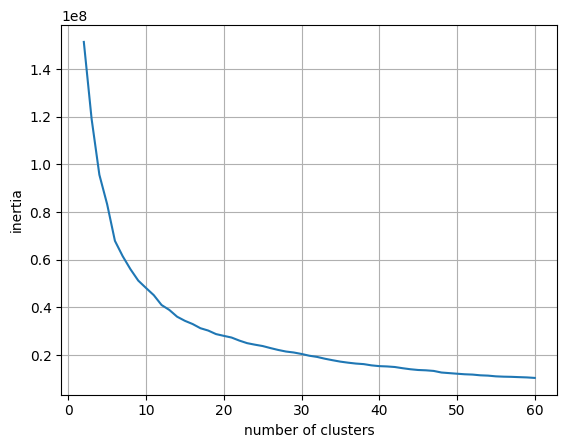

In [32]:
inertia_list = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=random_state)
    cluster_labels_train = clusterer.fit_predict(X)

    inertia_list.append(clusterer.inertia_)

plt.plot(range_n_clusters, inertia_list, label='inertia')
plt.xlabel("number of clusters")
plt.ylabel("inertia")
plt.grid()
plt.show()

In [33]:
clusterer = KMeans(n_clusters=22, random_state=random_state)
cluster_labels = clusterer.fit_predict(X)

y_df = pd.concat([y], axis=1)
y_df['y_pred'] = cluster_labels
pos_ratio = y_train.value_counts()[1]/len(y_train)

class_distribution = y_df.groupby('y_pred')['y'].value_counts().unstack(fill_value=0)
class_distribution['ratio'] = class_distribution[1]/(class_distribution[0]+class_distribution[1])
class_distribution['fit'] = np.where(class_distribution['ratio']>=pos_ratio, 1, 0)

# test scores
y_df = pd.concat([y], axis=1)
y_df['y_pred'] = cluster_labels
y_df['y_pred'] = np.where(y_df['y_pred'].isin(class_distribution.query('fit==1').index), 1, 0)

ami = adjusted_mutual_info_score(y, cluster_labels)
ari = adjusted_rand_score(y, cluster_labels)
f1_score = classification_report(y_df['y'], y_df['y_pred'], output_dict=True)['1']['f1-score']

print(f"ami: {ami}")
print(f"ari: {ari}")
print(f"f1_score: {f1_score}")

ami: 0.03480947206184745
ari: 0.005911574793103952
f1_score: 0.46884327000072795


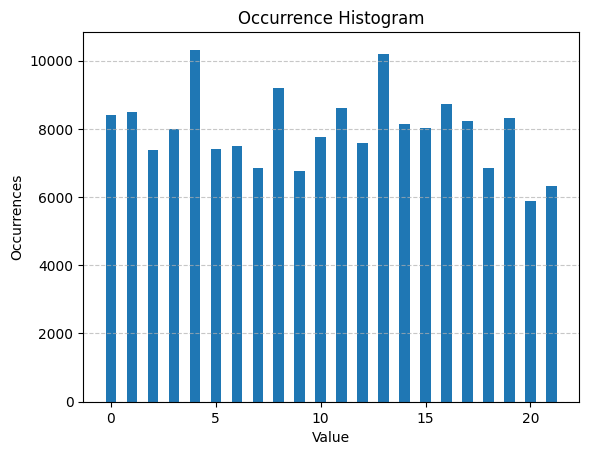

In [34]:
hist, bins = np.histogram(cluster_labels, bins=np.arange(cluster_labels.min(), cluster_labels.max() + 2))
plt.bar(bins[:-1], hist, align='center', width=0.5)
plt.xlabel('Value')
plt.ylabel('Occurrences')
plt.title('Occurrence Histogram')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.show()